In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploración de datos

### Tamaño de cada archivo
A través de la consola de comandos se verifica el número de líneas que tiene cada archivo

* train_ver2.csv
* test_ver2.csv

In [2]:
!wc data/train_ver2.csv data/train_ver2.csv

  13647310  160755658 2292759599 data/train_ver2.csv
  13647310  160755658 2292759599 data/train_ver2.csv
  27294620  321511316 4585519198 total


## Datos de entrenamiento *train_ver2.csv*

In [2]:
df = pd.read_csv('data/train_ver2.csv', dtype={'sexo': str,
                                                'age': str,
                                                'ind_nuevo': str,
                                                'indrel_1mes': str,
                                                'antiguedad': str,
                                                'ult_fec_cli_lt': str,
                                                'indext': str,
                                                'conyuemp': str})
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
df.shape

(13647309, 48)

Descripción breve de los atributos numéricos

In [5]:
df.describe()

,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,3.939238e-04,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,1.984361e-02,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Descripción del dataset

En esta sección se revisarán los 24 atributos del dataset, tanto los númericos como los atributos categóricos. Además se hará una revisión de los *targets* que se proveen



### Columnas con datos faltantes

In [3]:
missing = list(df.isnull().any())

In [4]:
missing_cols = [col for i, col in enumerate(df.columns) if missing[i]]
missing_vals = [val for val in sum(df.isnull().values * 1) if val > 0]

In [5]:
print("Cantidad de columnas con datos faltantes", len(missing_cols))

Cantidad de columnas con datos faltantes 22


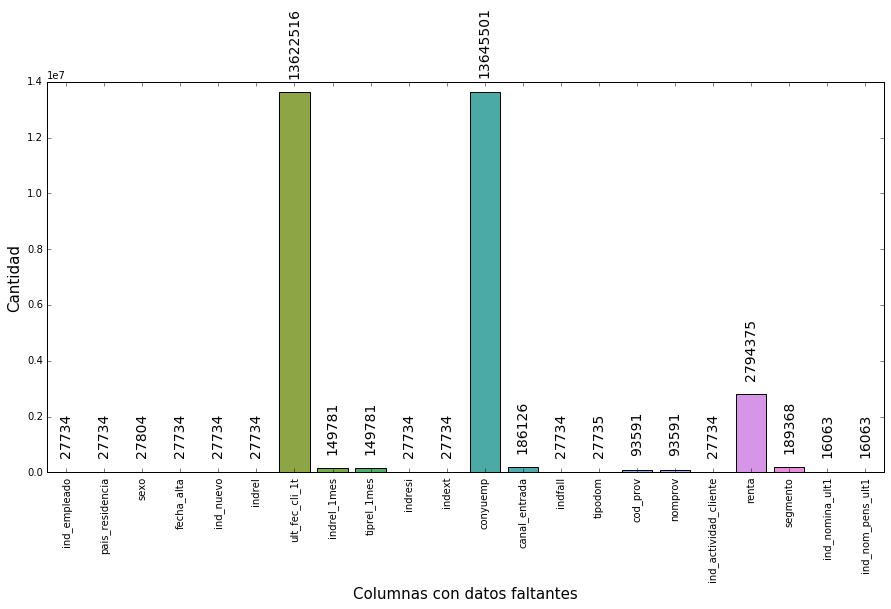

In [23]:
plt.figure(figsize=(15, 7))
graph = sns.barplot(missing_cols, missing_vals)
plt.xticks(rotation='vertical')
plt.ylabel('Cantidad', size=15)
plt.xlabel('Columnas con datos faltantes', size=15)
for i in range(len(missing_cols)):
    graph.text(i, missing_vals[i] + 500000, missing_vals[i], ha='center', va='bottom', rotation='vertical', size=14)

### Clientes
Cantidad de clientes 

In [24]:
cant_customers = len(df.ncodpers.unique())
print("Cantidad de clientes", cant_customers)
print("Concurrencia promedio de cada cliente", df.shape[0]/cant_customers)

Cantidad de clientes 956645
Concurrencia promedio de cada cliente 14.265802884037443


### Índice del empleado
Hay tres índices de empleado.

* A: Activo
* B: Ex-empleado
* F: Filial
* N: No es empleado
* P: Pasivo

In [25]:
print('Cantidad de valores faltantes', np.sum(df.ind_empleado.isnull().values))

Cantidad de valores faltantes 27734


In [26]:
ind_empleado_vals = df.ind_empleado.value_counts().values
ind_empleado_cols = df.ind_empleado.value_counts().index

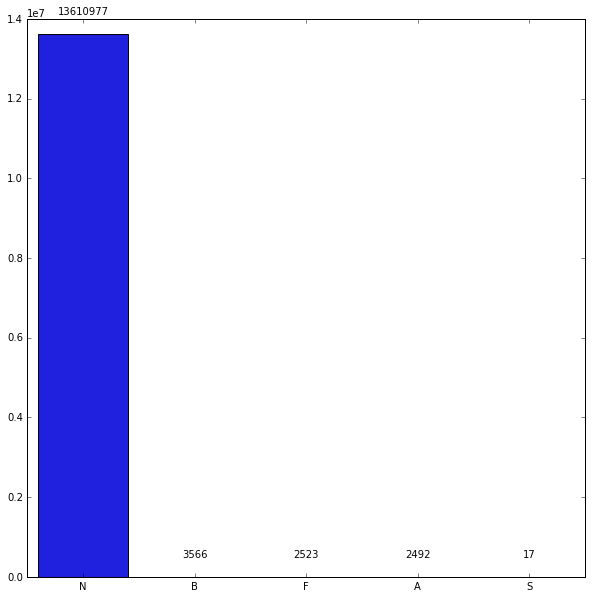

In [27]:
plt.figure(figsize=(10, 10))
graph = sns.barplot(ind_empleado_cols, ind_empleado_vals)
for i, val in enumerate(ind_empleado_vals):
    graph.text(i, val + 500000, val, ha='center')

### País de residencia
Los datos de esta columna están en código ISO 3166-1

In [32]:
import iso3166 as iso

In [43]:
countries_iso = df.pais_residencia.unique()

In [57]:
countries = [iso.countries_by_alpha2.get(c) for c in countries_iso]

In [77]:
countries_counts = df.pais_residencia.value_counts()

In [89]:
import geopip

In [72]:
from bokeh.io import output_notebook
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure, show
from bokeh.tile_providers import STAMEN_TONER
from bokeh.sampledata.sample_geojson import geojson

In [76]:
bound = 20000 # meters
geo_source = GeoJSONDataSource(geojson=geojson)
fig = figure(tools='pan, wheel_zoom')
fig.circle(x='x', y='y', alpha=0.9, source=geo_source)
output_notebook()
show(fig)

Loading BokehJS ...

In [12]:
dates_str = df.fecha_dato.value_counts().index
count_dates = df.fecha_dato.value_counts().values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

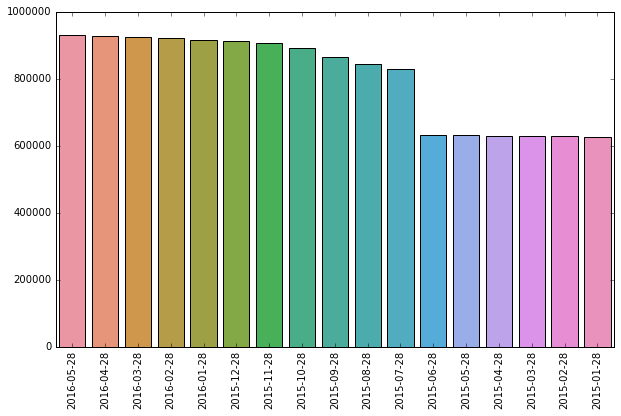

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(dates_str, count_dates)
plt.xticks(rotation='vertical')